# Requirements

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from traitlets import Integer

# Configuration

In [18]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [19]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

asdassd


In [20]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping on the website https://books.toscrape.com/. Your task includes the extraction of book titles and prices for a minimum of 20 books from this website. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of book prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

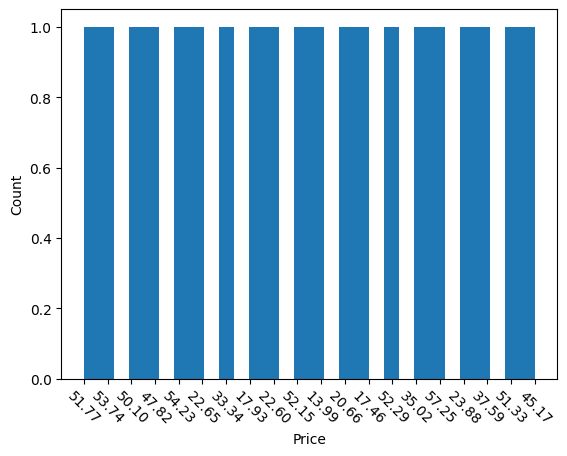

In [88]:
driver = webdriver.Chrome()
driver.get('https://books.toscrape.com/')
book_titles = driver.find_elements(By.CSS_SELECTOR, '.product_pod h3 a')
book_prices = driver.find_elements(By.CSS_SELECTOR, '.product_price p:first-of-type')
data = []
for i in range(len(book_titles)):
    dictionary = {
        "Book:" : book_titles[i].get_attribute("title"),
        "Price:" : book_prices[i].text.replace('£','')
    }
    data.append(dictionary)
df = pd.DataFrame(data)
df.to_csv('data_28.10.2024_1.csv')
plt.hist(df['Price:'], bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=315)
driver.quit()

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each book listed on the page, proceed to the individual page for each book, and extract the quantity of available copies. Subsequently, you are required to compute both the mean and standard deviation of the quantities of these books.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

The mean for the category Price is 19.35.
The standard deviation for the category Price is 0.7451598203705946.


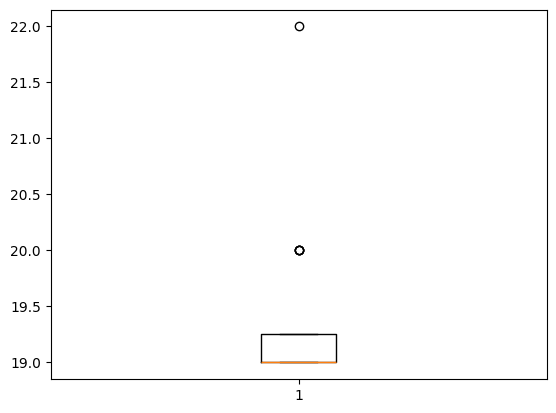

In [91]:
df = pd.read_csv('data_28.10.2024_1.csv')
df['Stock'] = 0
count_of_elements = len(df['Book:'])
driver = webdriver.Chrome()
driver.get('https://books.toscrape.com/')

for i in range(20):
    book_urls = driver.find_elements(By.CSS_SELECTOR, '.image_container a')
    url_of_a_book = book_urls[i].get_attribute("href")
    driver.get(url_of_a_book)
    in_stock = driver.find_element(By.CSS_SELECTOR,'.instock').text.split()[2].replace('(','')
    df.loc[i, 'Stock'] = int(in_stock)
    driver.get('https://books.toscrape.com/')
    
driver.quit()
df.drop('Unnamed: 0', axis=1, inplace=True)
print(f"The mean for the category Price is {df['Stock'].mean()}.")
print(f"The standard deviation for the category Price is {df['Stock'].std()}.")
plt.boxplot(df['Stock'])
df.to_csv('data_28.10.2024_2.csv')